In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%%capture
! pip install diffusers transformers

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def plot_array(y):
    x = np.arange(y.shape[0])

    # plotting

    plt.title("Line graph")

    plt.xlabel("X axis")

    plt.ylabel("Y axis")

    plt.plot(x, y, color ="red")
    return plt.show()

In [ ]:
import librosa
from IPython.display import Audio

n_mels = 512
fps = 30#12
offset = 11
duration = 10#3

audio_input = "/content/drive/MyDrive/audio_samples/1975_bagsy_20sec.wav"

wav, sr = librosa.load(audio_input)

#wav, sr = librosa.load(librosa.example('choice'), offset=offset, duration=duration)
Audio(wav, rate=sr)

# Determine the midpoint of the audio
midpoint = len(wav) // 2

# Split the audio into two parts
wav_part1 = wav[:midpoint]
wav = wav[midpoint:]

print("First part:")
Audio(wav, rate=sr)


First part:


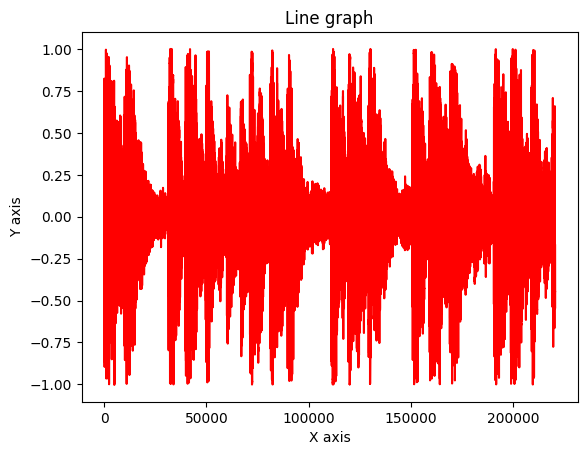

In [ ]:
plot_array(wav)

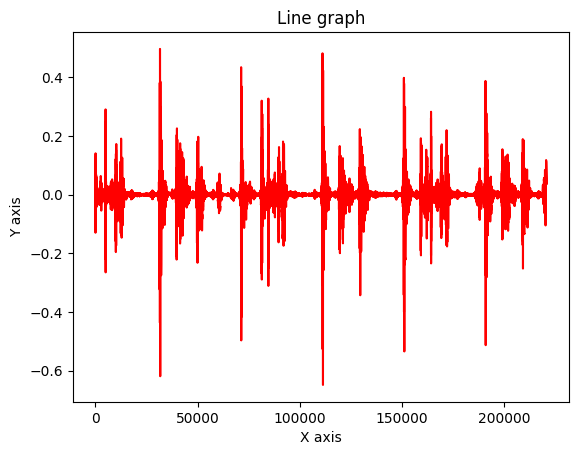

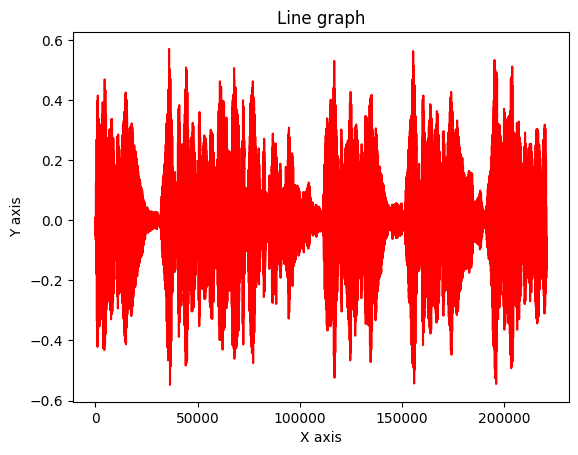

In [ ]:
wav_harmonic, wav_percussive = librosa.effects.hpss(wav, margin=(5.0, 5.0))
plot_array(wav_percussive)
plot_array(wav_harmonic)

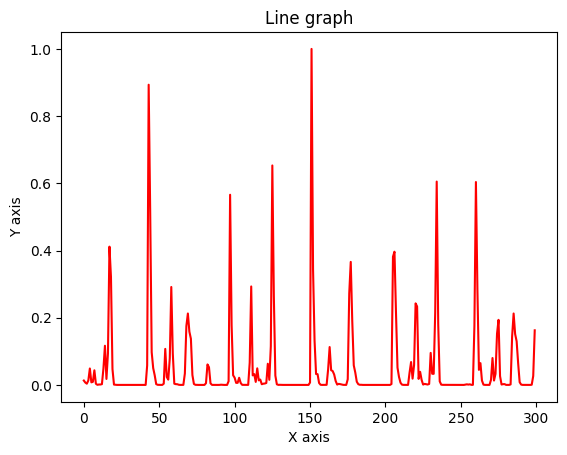

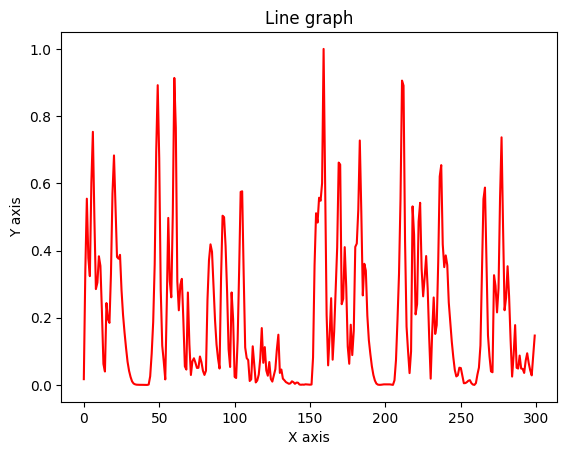

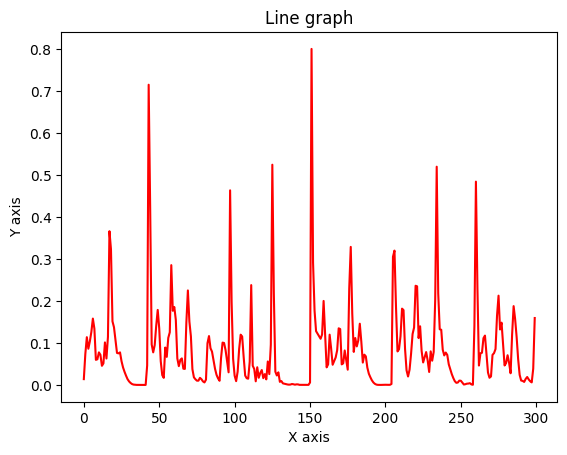

In [ ]:
# Number of audio samples per frame
frame_duration = int(sr / fps)

## percussive ------------------------------------------------
# Generate Mel Spectrogram
spec_raw = librosa.feature.melspectrogram(y=wav_percussive, sr=sr, n_mels=n_mels, hop_length=frame_duration)

# Obtain maximum value per time-frame
spec_max = np.amax(spec_raw, axis=0)

# Normalize all values between 0 and 1
spec_norm_P = (spec_max - np.min(spec_max)) / np.ptp(spec_max)

# rescale so its exactly the number of frames we want to generate
# 3 seconds at 12 fps == 36
amplitude_arr = np.resize(spec_norm_P, int(duration * fps))

plot_array(amplitude_arr)
#------------------------------------------------------------

## harmonic ------------------------------------------------
# Generate Mel Spectrogram
spec_raw_H = librosa.feature.melspectrogram(y=wav_harmonic, sr=sr, n_mels=n_mels, hop_length=frame_duration)

# Obtain maximum value per time-frame
spec_max_H = np.amax(spec_raw_H, axis=0)

# Normalize all values between 0 and 1
spec_norm_H = (spec_max_H - np.min(spec_max_H)) / np.ptp(spec_max_H)

# rescale so its exactly the number of frames we want to generate
# 3 seconds at 12 fps == 36
amplitude_arr_H = np.resize(spec_norm_H, int(duration * fps))

plot_array(amplitude_arr_H)
#------------------------------------------------------------

spec_norm_H_P = 0.20 * spec_norm_H + 0.80 * spec_norm_P # change depending on the song

amplitude_arr_H_P = np.resize(spec_norm_H_P, int(duration * fps))

plot_array(amplitude_arr_H_P)

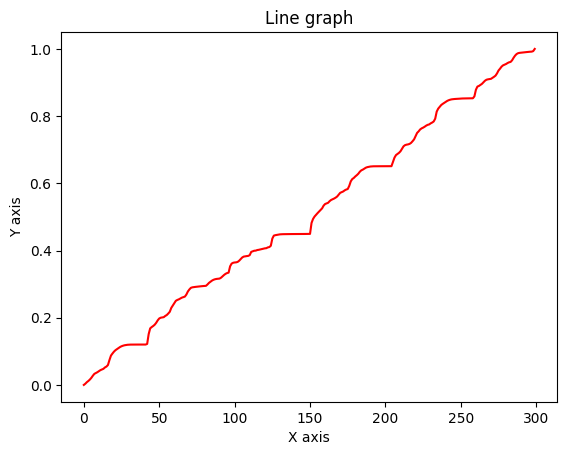

In [ ]:
# Cumulative sum of audio energy
#T = np.cumsum(amplitude_arr)
T = np.cumsum(amplitude_arr_H_P)

# Normalize values of T against last element
T /= T[-1]

# 0th element not always exactly 0.0. Enforcing that here.
T[0] = 0.0

plot_array(T)

#test

In [ ]:
#import torch
#from diffusers import AutoPipelineForImage2Image
#from diffusers.utils import make_image_grid, load_image
#from scipy.interpolate import interp1d
#import numpy as np

# Initialize the pipeline
#sd_pipe = AutoPipelineForImage2Image.from_pretrained(
#    "runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
#)
#pipeline.enable_model_cpu_offload()

import torch
from diffusers import StableDiffusionImageVariationPipeline
from PIL import Image
from torchvision import transforms
import numpy as np
import os
from pathlib import Path

# Device setup
device = "cuda"

output_dir = Path('images_walk_with_audio') # change output path
output_dir.mkdir(exist_ok=True, parents=True)

# Load the pre-trained model
sd_pipe = StableDiffusionImageVariationPipeline.from_pretrained(
    "lambdalabs/sd-image-variations-diffusers",
    revision="v2.0",
)
sd_pipe = sd_pipe.to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/284 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/703 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/871 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/5.01k [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/595 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [ ]:

# Load and preprocess the initial image

# Preprocess the images #transforms.Resize((224, 224)
def preprocess_image(image_path, device):
    im = Image.open(image_path).convert("RGB")
    tform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((512, 512), interpolation=transforms.InterpolationMode.BICUBIC, antialias=False
        ),
        transforms.Normalize([0.48145466, 0.4578275, 0.40821073], [0.26862954, 0.26130258, 0.27577711]),
    ])
    return tform(im).unsqueeze(0).to(device)

im1 = "/content/drive/MyDrive/image_samples/space_1.png"
im2 = "/content/drive/MyDrive/image_samples/space_2.jpg"

inp_initial = preprocess_image(im1, device)
inp_target = preprocess_image(im2, device)

# Function for encoding images to latent space
def encode_image(pipe, image):
    with torch.no_grad():
        latents = pipe.vae.encode(image).latent_dist.sample()
        latents = 0.18215 * latents
    return latents

# Encode initial and target images
latents_initial = encode_image(sd_pipe, inp_initial)
latents_target = encode_image(sd_pipe, inp_target)

#print(latents_initial)
#print(latents_target)
'''
# Function for spherical linear interpolation (slerp)
def slerp(val, low, high):
    """Spherical linear interpolation"""
    omega = torch.acos(torch.clamp(torch.dot(low / torch.norm(low), high / torch.norm(high)), -1, 1))
    so = torch.sin(omega)
    if so == 0:
        return (1.0 - val) * low + val * high  # LERP
    return torch.sin((1.0 - val) * omega) / so * low + torch.sin(val * omega) / so * high
'''

def slerp(t, v0, v1, DOT_THRESHOLD=0.9995):
    """helper function to spherically interpolate two arrays v1 v2"""
    if not isinstance(v0, np.ndarray):
        inputs_are_torch = True
        input_device = v0.device
        v0 = v0.cpu().numpy()
        v1 = v1.cpu().numpy()
    dot = np.sum(v0 * v1 / (np.linalg.norm(v0) * np.linalg.norm(v1)))

    if np.abs(dot) > DOT_THRESHOLD:
        v2 = (1 - t) * v0 + t * v1
    else:
        theta_0 = np.arccos(dot)
        sin_theta_0 = np.sin(theta_0)
        theta_t = theta_0 * t
        sin_theta_t = np.sin(theta_t)
        s0 = np.sin(theta_0 - theta_t) / sin_theta_0
        s1 = sin_theta_t / sin_theta_0
        v2 = s0 * v0 + s1 * v1

    if inputs_are_torch:
        v2 = torch.from_numpy(v2).to(input_device)
    return v2


z=0
# Interpolate noise vectors and generate image variations
# Interpolate latents and generate images
print("loop:start")
for i, t in enumerate(T):
    #print(z)
    latents_t = slerp(float(t), latents_initial.flatten(), latents_target.flatten()).view_as(latents_initial)
    #print(latents_t)
    with torch.no_grad():
        decoded_image = sd_pipe.vae.decode(latents_t / 0.18215).sample
        image = (decoded_image / 2 + 0.5).clamp(0, 1)
        image = transforms.ToPILImage()(image.squeeze().cpu())
        image.save(os.path.join(output_dir, f'frame{i:06d}.png'))
    z+=1
    #if z == 5:
    #  break


loop:start


In [ ]:
import soundfile as sf

sf.write(output_dir / 'audio_test.wav', wav, samplerate=sr)

In [ ]:
#change images_walk_with_audio path # -vf "scale=720:720" \
! ffmpeg \
  -r {fps} \
  -i /content/images_walk_with_audio/frame%06d.png \
  -i /content/images_walk_with_audio/audio_test.wav \
  -c copy \
  -map 0:v:0 \
  -map 1:a:0 \
  -acodec aac \
  -vcodec libx264 \
  -pix_fmt yuv420p \
  output_walk_with_audio.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def visualize_video_colab(video_path):
    mp4 = open(video_path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML("""
    <video width=400 controls>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url)

visualize_video_colab('output_walk_with_audio.mp4')

##for more than 10 sec

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%%capture
! pip install diffusers transformers

In [ ]:
from matplotlib import pyplot as plt
import numpy as np

def plot_array(y):
    x = np.arange(y.shape[0])

    # plotting

    plt.title("Line graph")

    plt.xlabel("X axis")

    plt.ylabel("Y axis")

    plt.plot(x, y, color ="red")
    return plt.show()

In [ ]:
import librosa
from IPython.display import Audio

n_mels = 512
fps = 30#12
offset = 11
duration = 10#3
num_parts = 3

audio_input = "/content/drive/MyDrive/audio_samples/birdman_30sec.wav"

wav, sr = librosa.load(audio_input)

#wav, sr = librosa.load(librosa.example('choice'), offset=offset, duration=duration)
Audio(wav, rate=sr)

audio_sections = []

samples_part = duration * sr
print(samples_part)
print(len(wav))

for i in range(0, len(wav), samples_part):
    end = i + samples_part
    audio_part = wav[i:end]
    audio_sections.append(audio_part)

Audio(audio_sections[1], rate=sr)


220500
661500


0


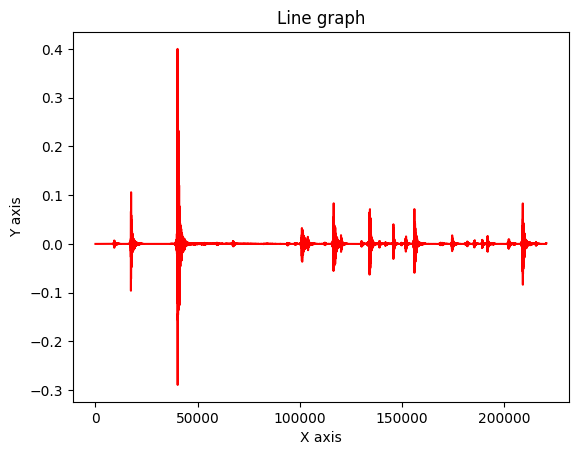

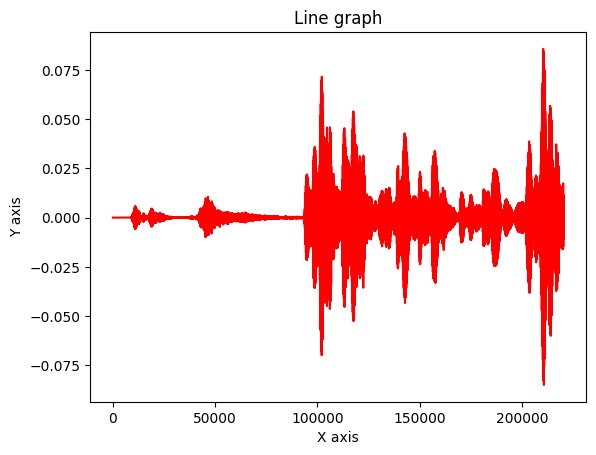

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+


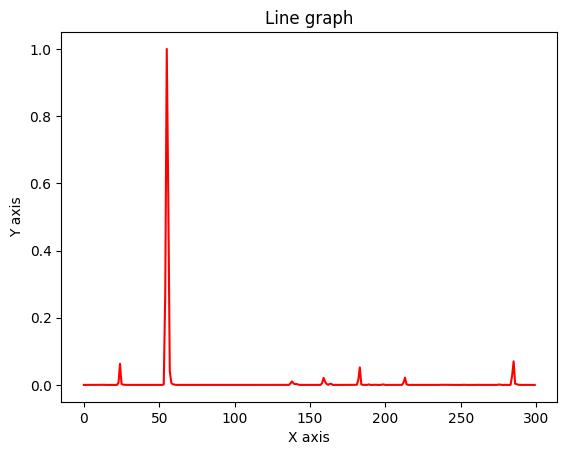

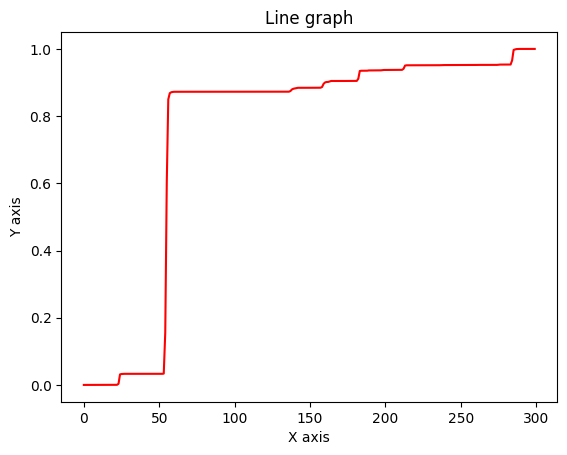

1


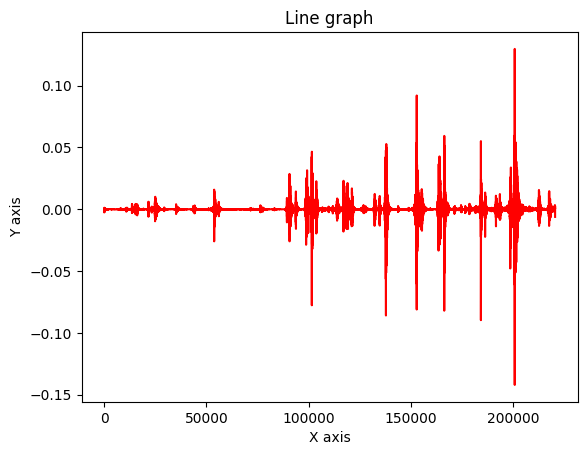

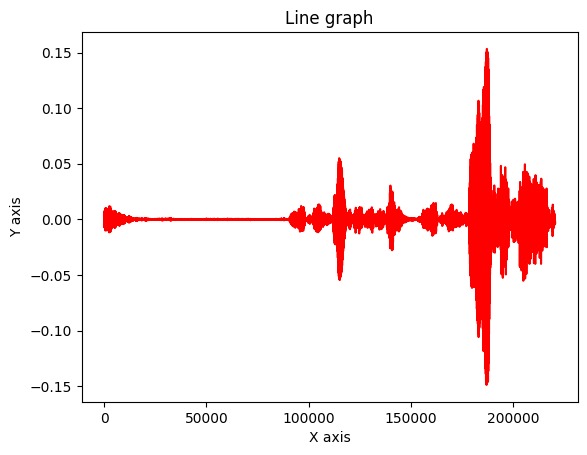

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+


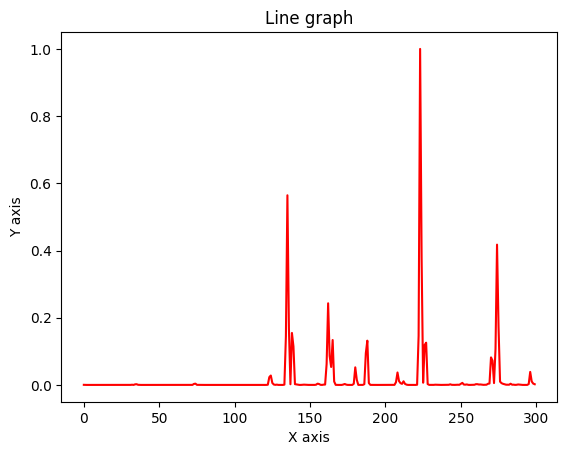

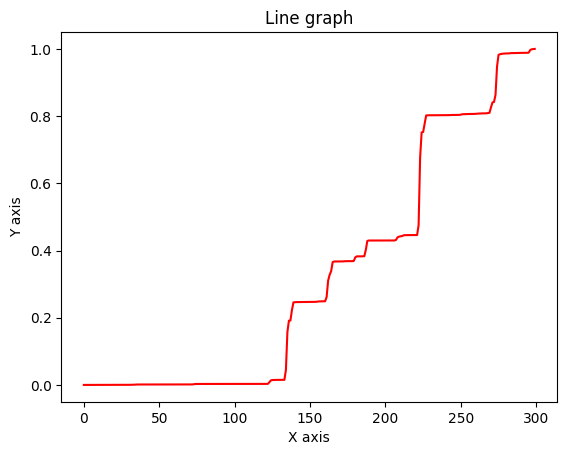

2


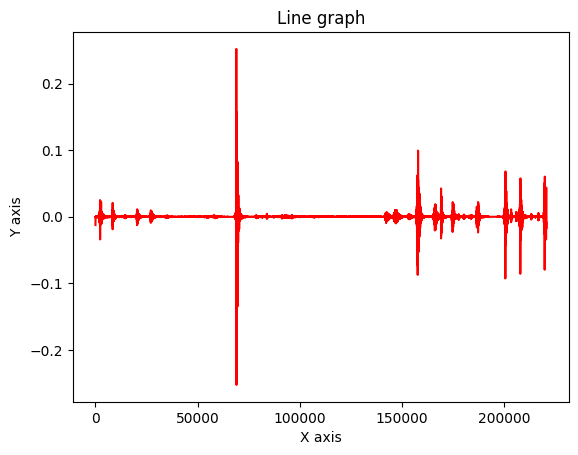

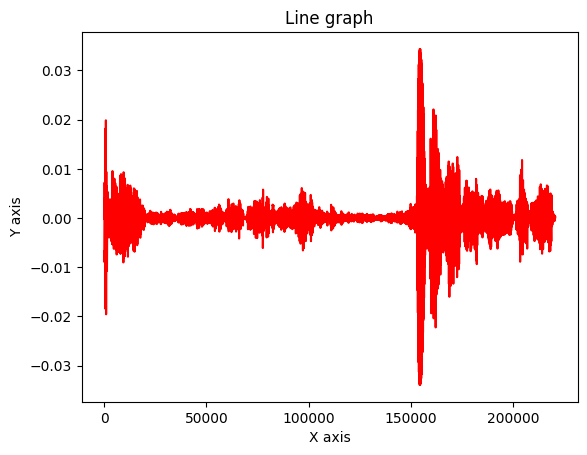

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+


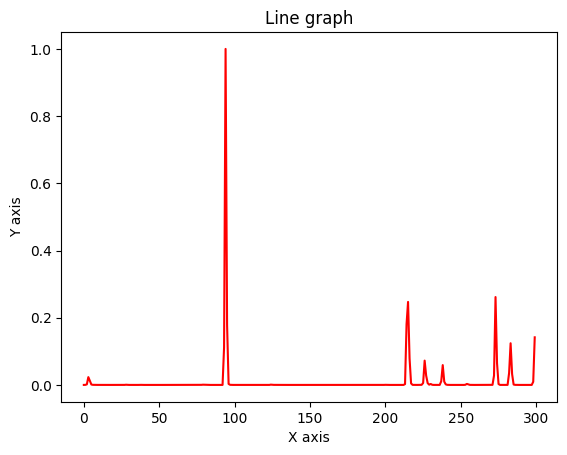

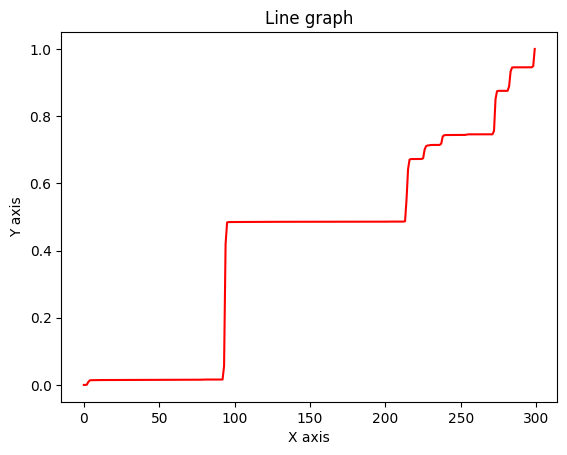

In [ ]:
T_sections = []
T_sections_linear = [] #for linear transformation testing
T_linear = np.linspace(0, 1, int(duration * fps)) #for linear transformation testing

for i in range(len(audio_sections)):

    print(i)
    wav_harmonic, wav_percussive = librosa.effects.hpss(audio_sections[i], margin=(5.0, 5.0)) #values above 5.0 don't seem to change anymore
    plot_array(wav_percussive)
    plot_array(wav_harmonic)
    print("-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+")


    # Number of audio samples per frame
    frame_duration = int(sr / fps)

    ## percussive ------------------------------------------------
    # Generate Mel Spectrogram
    spec_raw = librosa.feature.melspectrogram(y=wav_percussive, sr=sr, n_mels=n_mels, hop_length=frame_duration)

    # Obtain maximum value per time-frame
    spec_max = np.amax(spec_raw, axis=0)

    # Normalize all values between 0 and 1
    spec_norm_P = (spec_max - np.min(spec_max)) / np.ptp(spec_max)

    # rescale so its exactly the number of frames we want to generate
    # 3 seconds at 12 fps == 36
    #amplitude_arr = np.resize(spec_norm_P, int(duration * fps))

    #plot_array(amplitude_arr)
    #------------------------------------------------------------

    ## harmonic ------------------------------------------------
    # Generate Mel Spectrogram
    spec_raw_H = librosa.feature.melspectrogram(y=wav_harmonic, sr=sr, n_mels=n_mels, hop_length=frame_duration)

    # Obtain maximum value per time-frame
    spec_max_H = np.amax(spec_raw_H, axis=0)

    # Normalize all values between 0 and 1
    spec_norm_H = (spec_max_H - np.min(spec_max_H)) / np.ptp(spec_max_H)

    # rescale so its exactly the number of frames we want to generate
    # 3 seconds at 12 fps == 36
    #amplitude_arr_H = np.resize(spec_norm_H, int(duration * fps))

    #plot_array(amplitude_arr_H)
    #------------------------------------------------------------

    spec_norm_H_P = 0.00 * spec_norm_H + 1.00 * spec_norm_P # change depending on the song (default 0.20H - 0.80P)

    amplitude_arr_H_P = np.resize(spec_norm_H_P, int(duration * fps))

    plot_array(amplitude_arr_H_P)

    # Cumulative sum of audio energy
    T = np.cumsum(amplitude_arr_H_P)

    # Normalize values of T against last element
    T /= T[-1]

    # 0th element not always exactly 0.0. Enforcing that here.
    T[0] = 0.0

    plot_array(T)

    T_sections.append(T)

    T_sections_linear.append(T_linear) #for linear transformation testing

#Audio(wav_harmonic, rate=sr)
Audio(wav_percussive, rate=sr)



In [ ]:
import torch
from diffusers import StableDiffusionImageVariationPipeline
from PIL import Image
from torchvision import transforms
import numpy as np
import os
from pathlib import Path

# Device setup
device = "cuda"

output_dir = Path('images_walk_with_audio') # change output path
output_dir.mkdir(exist_ok=True, parents=True)

# Load the pre-trained model
sd_pipe = StableDiffusionImageVariationPipeline.from_pretrained(
    "lambdalabs/sd-image-variations-diffusers",
    revision="v2.0",
)
sd_pipe = sd_pipe.to(device)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors not found


Fetching 11 files:   0%|          | 0/11 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/518 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/5.01k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/284 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/871 [00:00<?, ?B/s]

image_encoder/config.json:   0%|          | 0.00/703 [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/595 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--lambdalabs--sd-image-variations-diffusers/snapshots/a2a13984e57db80adcc9e3f85d568dcccb9b29fc/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


In [ ]:

# Load and preprocess the initial image

# Preprocess the images #transforms.Resize((224, 224)
def preprocess_image(image_path, device):
    im = Image.open(image_path).convert("RGB")
    tform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((512, 512), interpolation=transforms.InterpolationMode.BICUBIC, antialias=False
        ),
        transforms.Normalize([0.48145466, 0.4578275, 0.40821073], [0.26862954, 0.26130258, 0.27577711]),
    ])
    return tform(im).unsqueeze(0).to(device)

im1 = "/content/drive/MyDrive/image_samples/lake_1.png"
im2 = "/content/drive/MyDrive/image_samples/lake_2.png"
im3 = "/content/drive/MyDrive/image_samples/lake_3.png"
default = "/content/drive/MyDrive/image_samples/vine-black-painted-swatch.jpg"

path_list = [default, im1, im2, im3]

# Function for encoding images to latent space
def encode_image(pipe, image):
    with torch.no_grad():
        latents = pipe.vae.encode(image).latent_dist.sample()
        latents = 0.18215 * latents
    return latents

def slerp(t, v0, v1, DOT_THRESHOLD=0.9995):
    """helper function to spherically interpolate two arrays v1 v2"""
    if not isinstance(v0, np.ndarray):
        inputs_are_torch = True
        input_device = v0.device
        v0 = v0.cpu().numpy()
        v1 = v1.cpu().numpy()
    dot = np.sum(v0 * v1 / (np.linalg.norm(v0) * np.linalg.norm(v1)))

    if np.abs(dot) > DOT_THRESHOLD:
        v2 = (1 - t) * v0 + t * v1
    else:
        theta_0 = np.arccos(dot)
        sin_theta_0 = np.sin(theta_0)
        theta_t = theta_0 * t
        sin_theta_t = np.sin(theta_t)
        s0 = np.sin(theta_0 - theta_t) / sin_theta_0
        s1 = sin_theta_t / sin_theta_0
        v2 = s0 * v0 + s1 * v1

    if inputs_are_torch:
        v2 = torch.from_numpy(v2).to(input_device)
    return v2

# Interpolate noise vectors and generate image variations
# Interpolate latents and generate images
z = 0
print("loop:start")
i=0
for j in range(len(T_sections)):
    T = T_sections[j]
    #T = T_sections_linear[j] # for linear tests

    if z == 0:
        inp_initial = preprocess_image(path_list[0], device)
        inp_target = preprocess_image(path_list[1], device)
    else:
        #print(path_list[index])
        index = z + 1
        inp_initial = inp_target
        inp_target = preprocess_image(path_list[index], device)
    # Encode initial and target images
    latents_initial = encode_image(sd_pipe, inp_initial)
    latents_target = encode_image(sd_pipe, inp_target)
    for k, t in enumerate(T):

        latents_t = slerp(float(t), latents_initial.flatten(), latents_target.flatten()).view_as(latents_initial)

        with torch.no_grad():
            decoded_image = sd_pipe.vae.decode(latents_t / 0.18215).sample
            image = (decoded_image / 2 + 0.5).clamp(0, 1)
            image = transforms.ToPILImage()(image.squeeze().cpu())
            image.save(os.path.join(output_dir, f'frame{i:06d}.png'))
        i+=1
    z+=1



loop:start


In [ ]:
import soundfile as sf

sf.write(output_dir / 'audio_test.wav', wav, samplerate=sr)

In [ ]:
#change images_walk_with_audio path # -vf "scale=720:720" \
! ffmpeg \
  -r {fps} \
  -i /content/images_walk_with_audio/frame%06d.png \
  -i /content/images_walk_with_audio/audio_test.wav \
  -c copy \
  -map 0:v:0 \
  -map 1:a:0 \
  -acodec aac \
  -vcodec libx264 \
  -pix_fmt yuv420p \
  output_walk_with_audio.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
from IPython.display import HTML
from base64 import b64encode

def visualize_video_colab(video_path):
    mp4 = open(video_path,'rb').read()
    data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
    return HTML("""
    <video width=400 controls>
        <source src="%s" type="video/mp4">
    </video>
    """ % data_url)

visualize_video_colab('output_walk_with_audio.mp4')